# Exploratory Data Analysis for Flood Prediction Dataset (Kaggle)

In [36]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = os.path.join("datasets", "floods_bangladesh.csv")
floods = pd.read_csv(data_path, skiprows=1)
# Define the column names
floods.columns = ['Station_Index', 'Station_Name', 'Year', 'Month', 'Max_Temp', 
                  'Min_Temp', 'Monthly_Rainfall', 'Relative_Humidity', 'Wind_Speed',
                  'Cloud_Coverage', 'Hours_of_Sunshine', 'Station_Number',
                  'X_Coord', 'Y_Coord', 'Latitude', 'Longitude', 'Altitude',
                  'Year_Month', 'Flood']

floods['Flood'] = floods['Flood'].fillna(0)
floods.head()

,Station_Index,Station_Name,Year,Month,Max_Temp,Min_Temp,Monthly_Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Hours_of_Sunshine,Station_Number,X_Coord,Y_Coord,Latitude,Longitude,Altitude,Year_Month,Flood
0,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,0.0
1,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,0.0
2,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,0.0
3,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,0.0
4,5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0


### Column information:
- SI: Station Index
- Station: Weather Station
- Year: year of event

In [37]:
# Info and Shape
print(floods.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20543 entries, 0 to 20542
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station_Index      20543 non-null  int64  
 1   Station_Name       20543 non-null  object 
 2   Year               20543 non-null  int64  
 3   Month              20543 non-null  int64  
 4   Max_Temp           20543 non-null  float64
 5   Min_Temp           20543 non-null  float64
 6   Monthly_Rainfall   20543 non-null  float64
 7   Relative_Humidity  20543 non-null  float64
 8   Wind_Speed         20543 non-null  float64
 9   Cloud_Coverage     20543 non-null  float64
 10  Hours_of_Sunshine  20543 non-null  float64
 11  Station_Number     20543 non-null  int64  
 12  X_Coord            20543 non-null  float64
 13  Y_Coord            20543 non-null  float64
 14  Latitude           20543 non-null  float64
 15  Longitude          20543 non-null  float64
 16  Altitude           205

In [38]:
floods.describe().T

,count,mean,std,min,25%,50%,75%,max
Station_Index,20543.0,10272.000000,5930.397626,1.00,5136.500000,10272.00,15407.500,20543.00
Year,20543.0,1985.334713,17.609403,1948.00,1972.000000,1987.00,2000.000,2013.00
Month,20543.0,6.500268,3.452007,1.00,4.000000,7.00,9.500,12.00
Max_Temp,20543.0,33.450936,2.956337,21.60,31.700000,33.90,35.400,44.00
Min_Temp,20543.0,21.167303,4.949320,6.20,16.900000,23.40,25.400,28.10
Monthly_Rainfall,20543.0,198.786297,240.695060,0.00,8.000000,111.00,312.000,2072.00
Relative_Humidity,20543.0,79.497935,7.667692,34.00,75.000000,81.00,85.000,97.00
Wind_Speed,20543.0,1.415096,1.042457,0.00,0.700000,1.20,1.900,11.20
Cloud_Coverage,20543.0,3.485967,2.083744,0.00,1.600000,3.30,5.500,7.90
Hours_of_Sunshine,20543.0,6.418987,1.747973,0.00,4.965517,6.80,7.800,11.00


Flood
0.0    16411
1.0     4132
Name: count, dtype: int64


<Axes: xlabel='Flood', ylabel='count'>

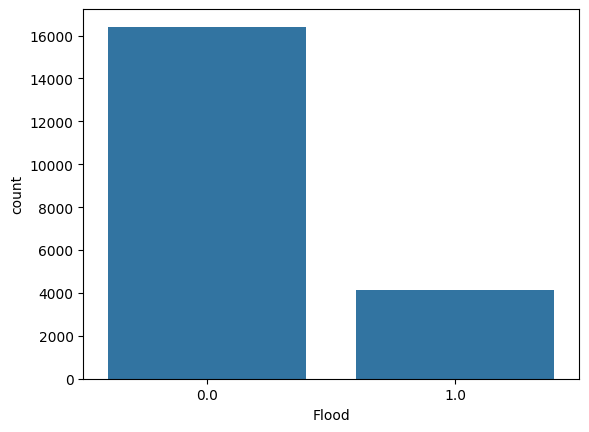

In [39]:
# Check dataset balance
print(floods['Flood'].value_counts())
sns.countplot(x='Flood', data=floods)

<Axes: >

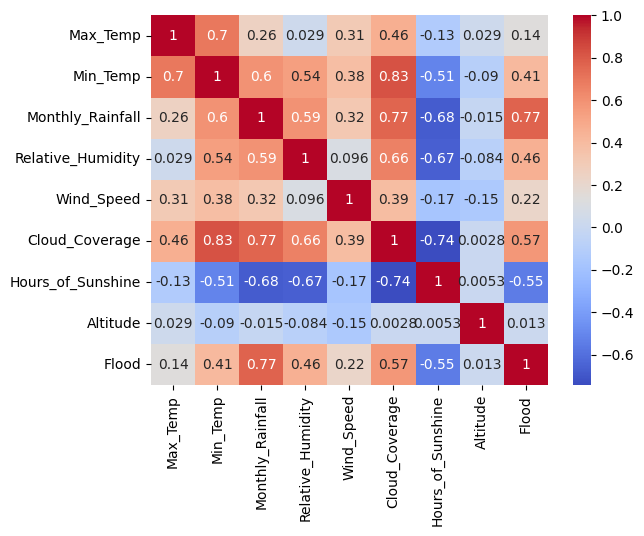

In [40]:
# Define the important data columns
num_cols = ['Max_Temp', 'Min_Temp', 'Monthly_Rainfall', 'Relative_Humidity', 'Wind_Speed',
            'Cloud_Coverage', 'Hours_of_Sunshine', 'Altitude', 'Flood']

# Visualize the correlation matrix
corr = floods[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [41]:
# Let's try a simple model
X = floods[num_cols].drop('Flood', axis=1)
y = floods['Flood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

[[3191   88]
 [ 134  696]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      3279
         1.0       0.89      0.84      0.86       830

    accuracy                           0.95      4109
   macro avg       0.92      0.91      0.91      4109
weighted avg       0.95      0.95      0.95      4109

Accuracy:  0.9459722560233633
F1 Score:  0.862453531598513
